In [2]:
# Week 1 - Water Quality Monitoring Project
# Author: Sonu Kumar

# Step 1: Import Libraries
import pandas as pd
import numpy as np

# Step 2: Load Dataset
data = pd.read_csv("water_potability.csv")

# Step 3: Explore Dataset
print("📌 Dataset Basic Info:\n")
print(data.info())

print("\n📌 First 5 Rows:\n")
print(data.head())

print("\n📌 Statistical Summary:\n")
print(data.describe())

print("\n📌 Missing Values Count:\n")
print(data.isnull().sum())

print("\n📌 Dataset Shape:", data.shape)

📌 Dataset Basic Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None

📌 First 5 Rows:

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  

✅ Dataset loaded successfully!

📌 First 5 rows of dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  

🔎 Missing values before cleaning:
 ph                 491
Hardness             0
Solids            

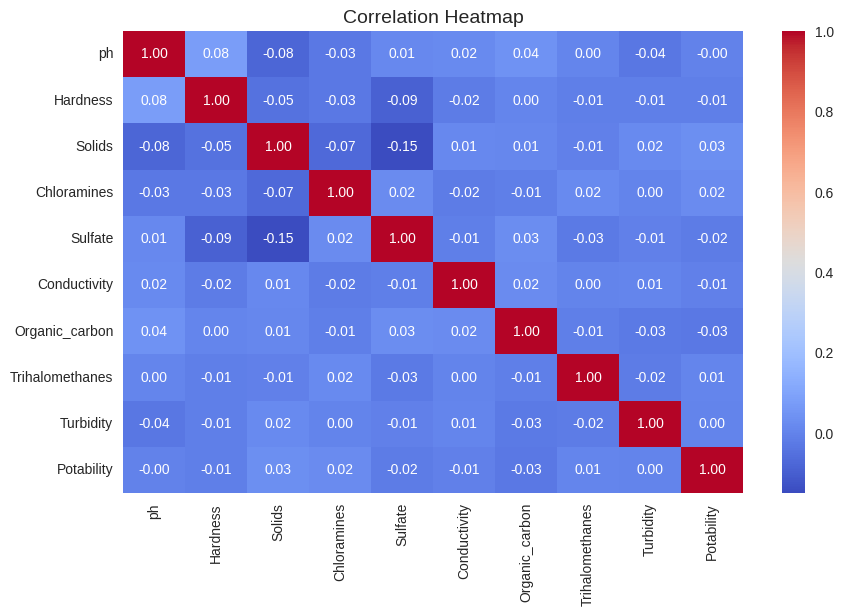

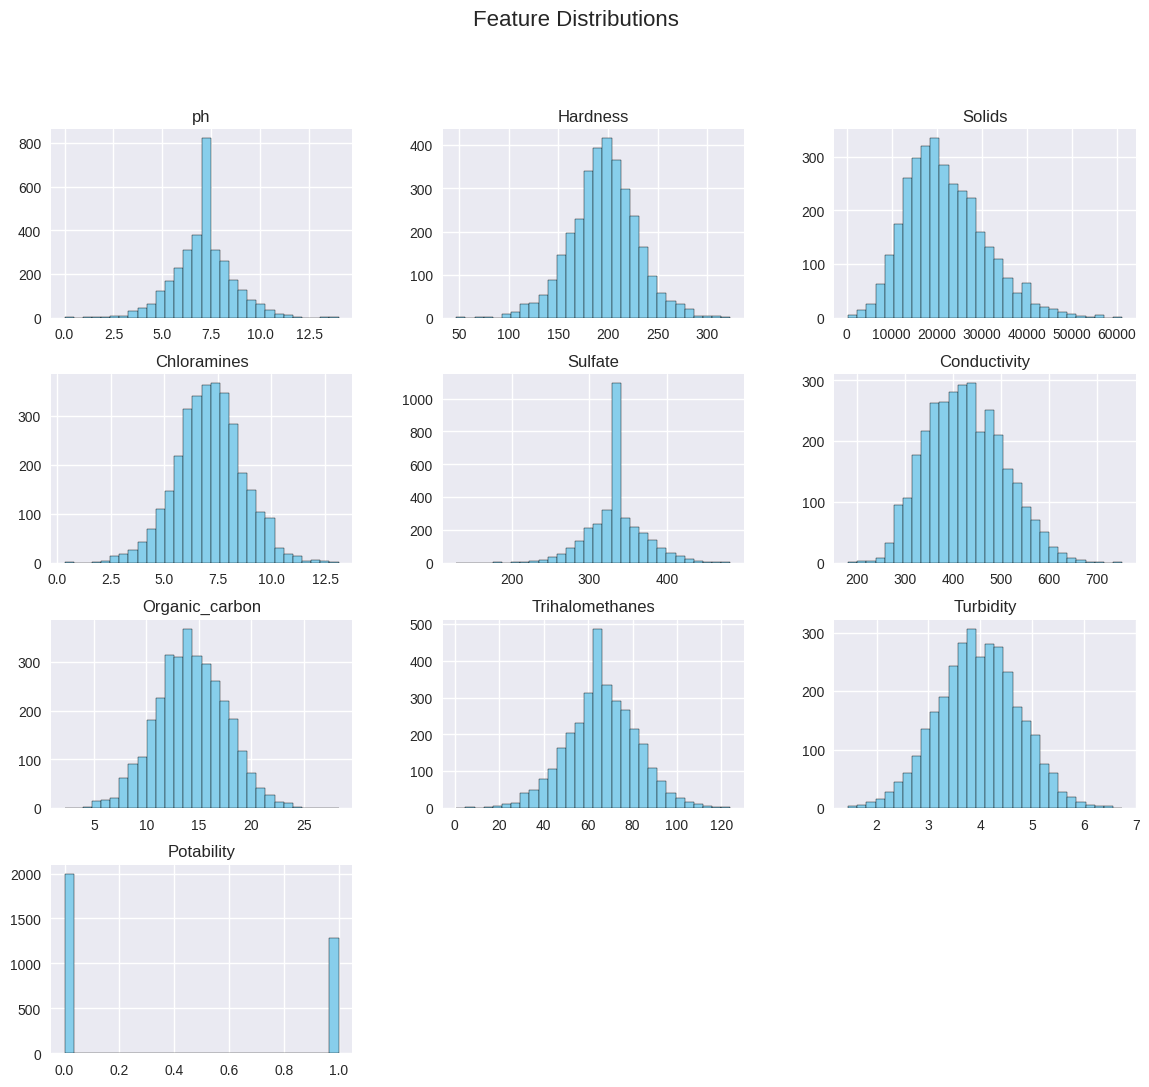

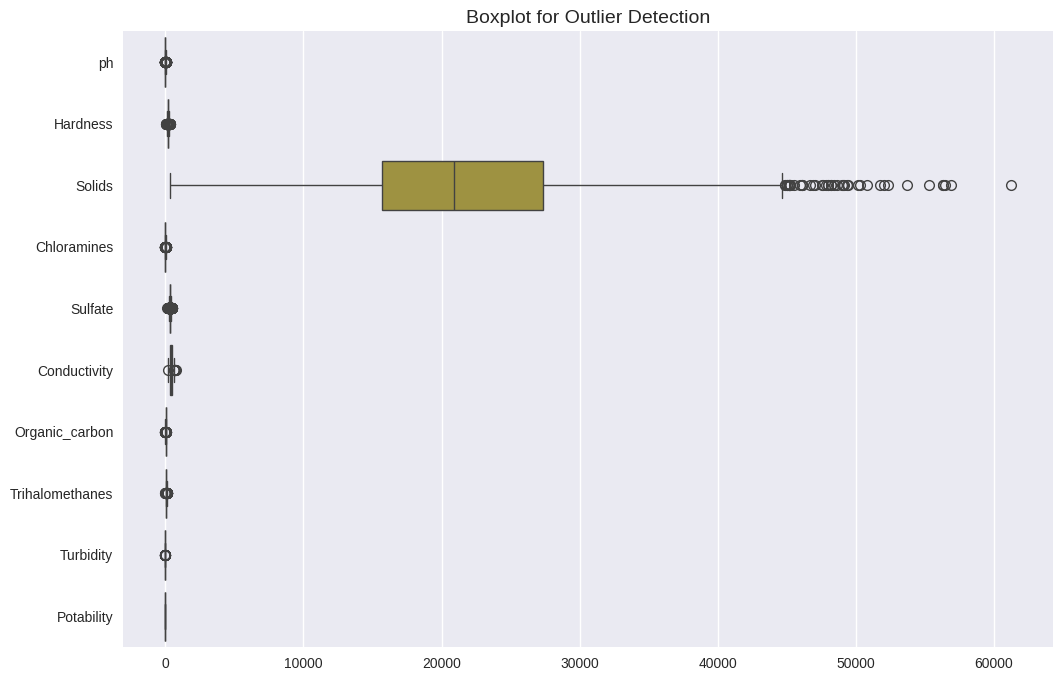

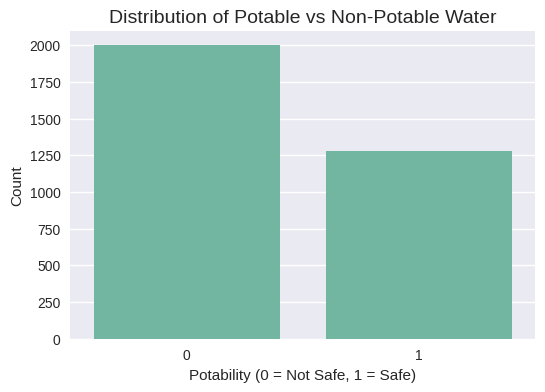

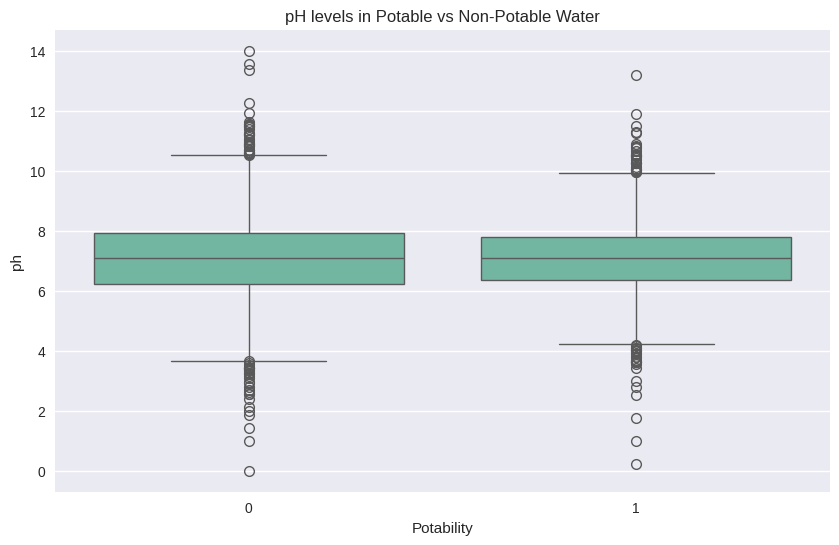

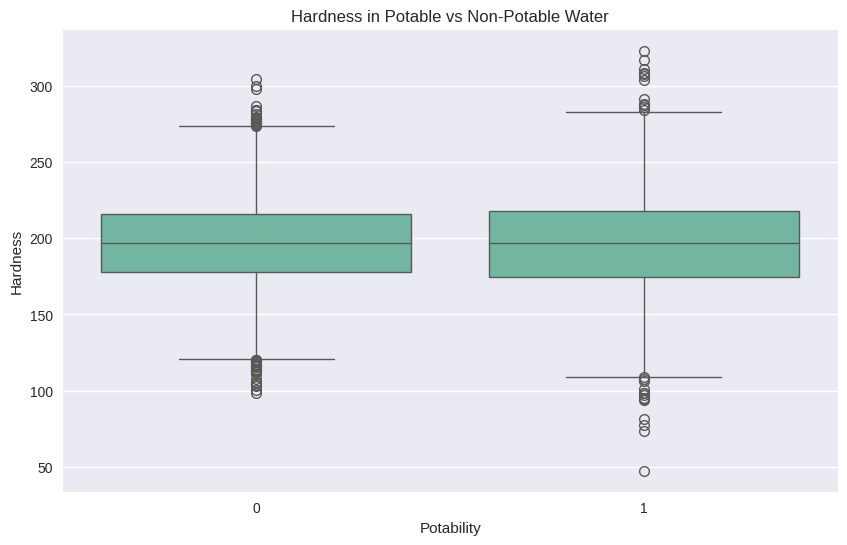


✅ Cleaned dataset saved as 'cleaned_water_potability.csv'

📌 Key Insights from Week 2:
1. Missing values in 'ph', 'Sulfate', and 'Trihalomethanes' were handled using mean imputation.
2. Duplicate rows (if any) were removed to ensure clean data.
3. The dataset is imbalanced: fewer potable (safe) samples compared to non-potable ones.
4. Correlation analysis shows some features influence Potability more than others.
5. Outliers exist in some features (e.g., solids, hardness) → may need handling before modeling.
6. Potable vs Non-Potable distribution visualization confirms dataset imbalance.


In [ ]:
# 📘 Week 2 – Water Quality Monitoring Project

# ======================
# 1. Import Libraries
# ======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look better
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

# ======================
# 2. Load Dataset
# ======================
try:
    df = pd.read_csv("water_potability.csv")
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ Dataset not found. Please upload 'water_potability.csv'.")

# Preview data
print("\n📌 First 5 rows of dataset:")
print(df.head())

# ======================
# 3. Data Cleaning
# ======================

# Check for missing values
print("\n🔎 Missing values before cleaning:\n", df.isnull().sum())

# Fill missing values with mean (numeric columns only)
for col in ["ph", "Sulfate", "Trihalomethanes"]:
    df[col] = df[col].fillna(df[col].mean())

# Double-check missing values
print("\n✅ Missing values after cleaning:\n", df.isnull().sum())

# Check duplicates
duplicates = df.duplicated().sum()
print(f"\n🔁 Number of duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print("✅ Duplicates removed.")

# ======================
# 4. Exploratory Data Analysis (EDA)
# ======================

# Dataset Info
print("\n📊 Dataset Info:")
print(df.info())

print("\n📊 Dataset Description (Statistics):")
print(df.describe())

print(f"\n📊 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

# ---- Correlation Heatmap ----
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# ---- Histograms (Feature Distributions) ----
df.hist(figsize=(14,12), bins=30, color='skyblue', edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# ---- Boxplots (Outlier Detection) ----
plt.figure(figsize=(12,8))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot for Outlier Detection", fontsize=14)
plt.show()

# ---- Potable vs Non-Potable Water ----
plt.figure(figsize=(6,4))
sns.countplot(x="Potability", data=df)
plt.title("Distribution of Potable vs Non-Potable Water", fontsize=14)
plt.xlabel("Potability (0 = Not Safe, 1 = Safe)")
plt.ylabel("Count")
plt.show()

# ---- Feature Comparison by Potability ----
plt.figure(figsize=(10,6))
sns.boxplot(x="Potability", y="ph", data=df)
plt.title("pH levels in Potable vs Non-Potable Water")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x="Potability", y="Hardness", data=df)
plt.title("Hardness in Potable vs Non-Potable Water")
plt.show()

# ======================
# 5. Save Cleaned Dataset
# ======================
df.to_csv("cleaned_water_potability.csv", index=False)
print("\n✅ Cleaned dataset saved as 'cleaned_water_potability.csv'")

# ======================
# 6. Key Insights
# ======================
print("\n📌 Key Insights from Week 2:")
print("1. Missing values in 'ph', 'Sulfate', and 'Trihalomethanes' were handled using mean imputation.")
print("2. Duplicate rows (if any) were removed to ensure clean data.")
print("3. The dataset is imbalanced: fewer potable (safe) samples compared to non-potable ones.")
print("4. Correlation analysis shows some features influence Potability more than others.")
print("5. Outliers exist in some features (e.g., solids, hardness) → may need handling before modeling.")
print("6. Potable vs Non-Potable distribution visualization confirms dataset imbalance.")


✅ Loaded dataset from: cleaned_water_potability.csv

Dataset shape: (3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0



Train size: 2620 | Test size: 656
✅ XGBoost available and will be used.

--- Model: LogisticRegression ---
Accuracy: 0.6098 | Precision: 0.0000 | Recall: 0.0000 | F1: 0.0000 | ROC-AUC: 0.5484

Classification Report:
               precision    recall  f1-score   support

           0     0.6098    1.0000    0.7576       400
           1     0.0000    0.0000    0.0000       256

    accuracy                         0.6098       656
   macro avg     0.3049    0.5000    0.3788       656
weighted avg     0.3718    0.6098    0.4619       656



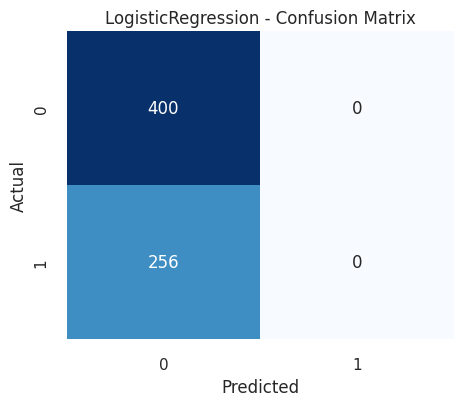

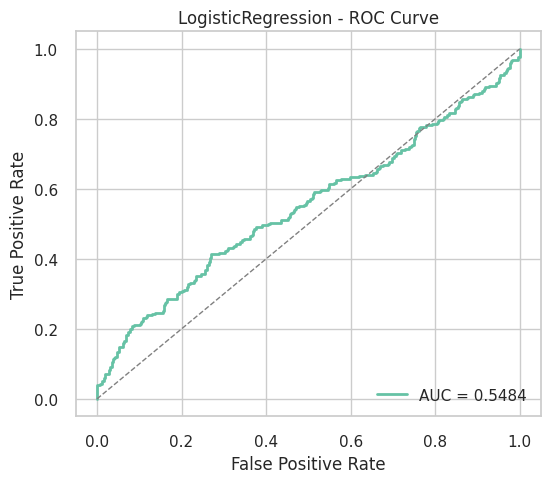


--- Model: RandomForest ---
Accuracy: 0.6601 | Precision: 0.6602 | Recall: 0.2656 | F1: 0.3788 | ROC-AUC: 0.6639

Classification Report:
               precision    recall  f1-score   support

           0     0.6600    0.9125    0.7660       400
           1     0.6602    0.2656    0.3788       256

    accuracy                         0.6601       656
   macro avg     0.6601    0.5891    0.5724       656
weighted avg     0.6601    0.6601    0.6149       656



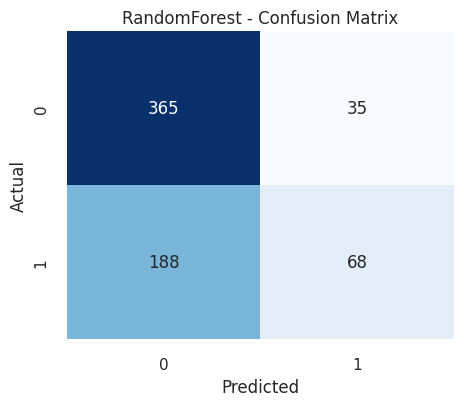

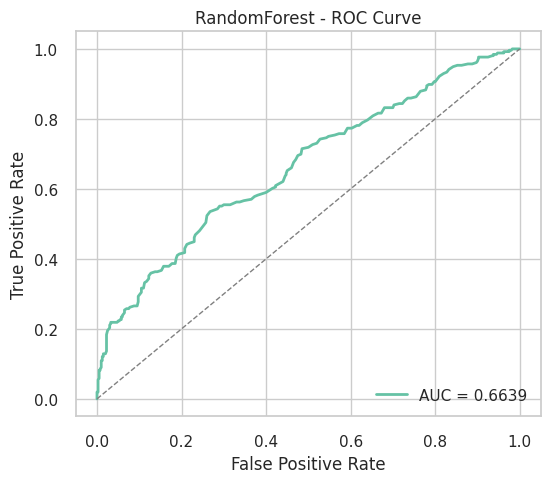


--- Model: XGBoost ---
Accuracy: 0.6204 | Precision: 0.5181 | Recall: 0.3906 | F1: 0.4454 | ROC-AUC: 0.6090

Classification Report:
               precision    recall  f1-score   support

           0     0.6631    0.7675    0.7115       400
           1     0.5181    0.3906    0.4454       256

    accuracy                         0.6204       656
   macro avg     0.5906    0.5791    0.5785       656
weighted avg     0.6065    0.6204    0.6077       656



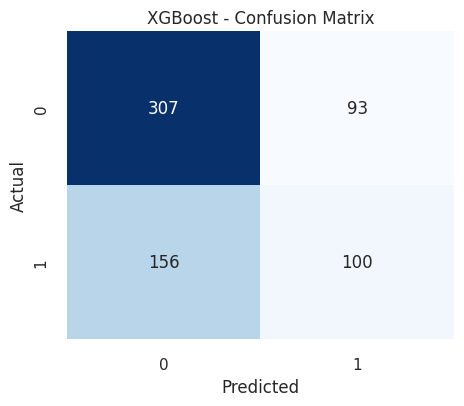

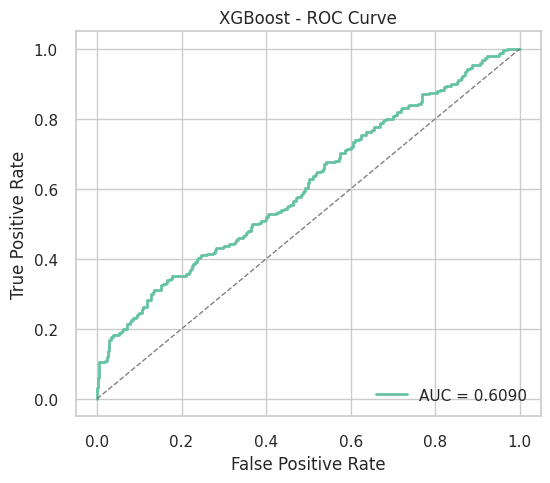


🔁 RandomForest 5-fold CV Accuracy: 0.6725

=== Model Comparison ===


,model,accuracy,precision,recall,f1,roc_auc,cv_accuracy
1,RandomForest,0.660061,0.660194,0.265625,0.378830,0.663857,0.672468
2,XGBoost,0.620427,0.518135,0.390625,0.445434,0.608955,NaN
0,LogisticRegression,0.609756,0.000000,0.000000,0.000000,0.548418,NaN


✅ Saved results_summary.csv


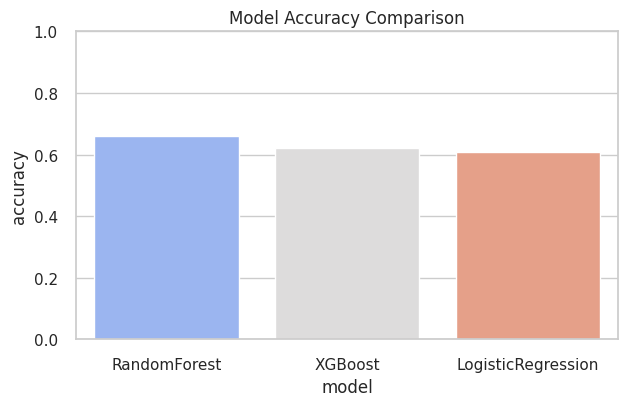

,feature,importance
0,ph,0.130300
4,Sulfate,0.124528
1,Hardness,0.120047
3,Chloramines,0.116503
2,Solids,0.113347
5,Conductivity,0.100968
8,Turbidity,0.099234
6,Organic_carbon,0.098089
7,Trihalomethanes,0.096984


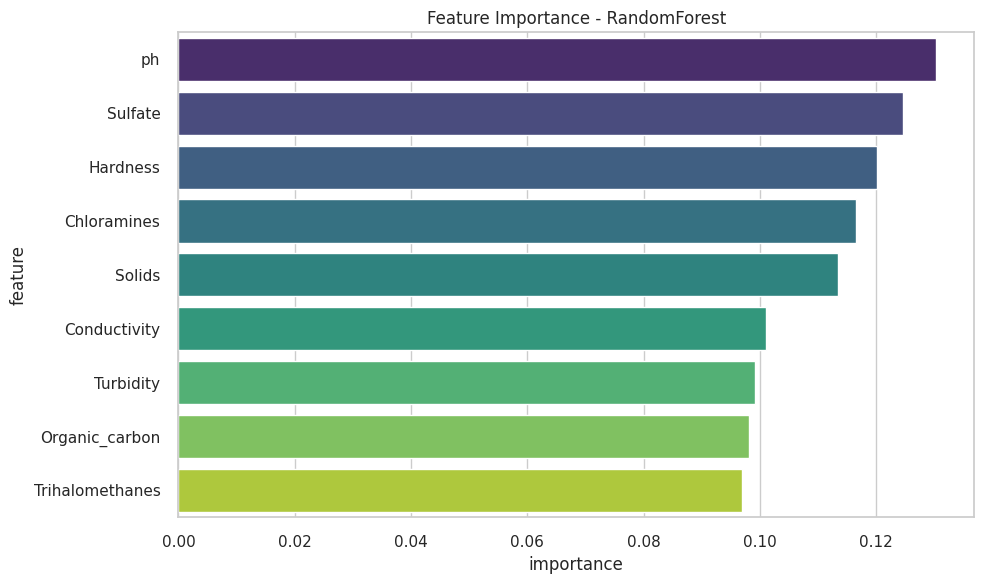

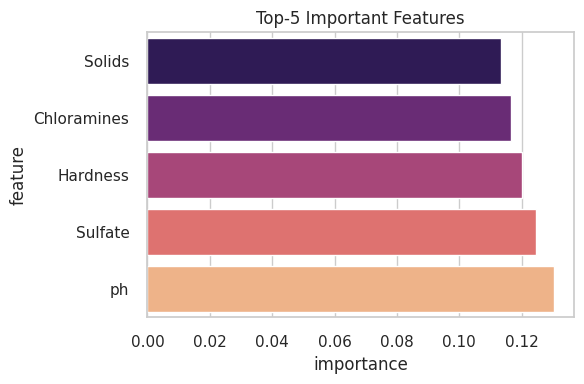


📌 Final Insights:
- Best model (by accuracy on test set): RandomForest
- Consider using SMOTE or class-weight tuning if recall for minority class needs improvement.
- Feature importance shows which chemical parameters most influence potability (see images/).
✅ Saved final_insights.txt

All artifacts saved:
 - images/confusion_LogisticRegression.png
 - images/confusion_RandomForest.png
 - images/confusion_XGBoost.png
 - images/feature_importance_rf.png
 - images/model_accuracy_comparison.png
 - images/roc_LogisticRegression.png
 - images/roc_RandomForest.png
 - images/roc_XGBoost.png
 - images/top5_features.png
 - results_summary.csv
 - final_insights.txt


In [7]:
# ===============================
# Final - Week 3: Complete ML Pipeline
# Water Quality Monitoring - Final Submission
# Author: Sonu Kumar
# ===============================

# 0. NOTES:
# - Make sure cleaned_water_potability.csv exists in current directory (dataset/ or root).
# - If running in Colab, upload the file or mount drive.
# - This script will create 'images/' folder and save plots there.

# ===============================
# 1. Imports & Settings
# ===============================
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
)

sns.set_theme(style="whitegrid", palette="Set2")
RANDOM_STATE = 42

# Create images directory
os.makedirs("images", exist_ok=True)

# ===============================
# 2. Load cleaned dataset
# ===============================
# Try common paths
possible_paths = [
    "cleaned_water_potability.csv",
    "dataset/cleaned_water_potability.csv",
    "data/cleaned_water_potability.csv",
    "dataset/cleaned_water_quality.csv"
]

df = None
for p in possible_paths:
    if os.path.exists(p):
        df = pd.read_csv(p)
        print(f"✅ Loaded dataset from: {p}")
        break

if df is None:
    raise FileNotFoundError("cleaned_water_potability.csv not found. Upload it to the notebook directory or dataset/ folder.")

# Quick check
print("\nDataset shape:", df.shape)
display(df.head())

# ===============================
# 3. Prepare features & target
# ===============================
if "Potability" not in df.columns:
    raise KeyError("Target column 'Potability' not found in dataset.")

X = df.drop(columns=["Potability"])
y = df["Potability"]

# Save a copy of cleaned dataset to repo root (ensures consistent path)
import os

# Create folder if not exists
os.makedirs("dataset", exist_ok=True)

# Save cleaned dataset inside dataset/ folder
df.to_csv("dataset/cleaned_water_potability.csv", index=False)

# ===============================
# 4. Train-test split (stratified)
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)
print(f"\nTrain size: {X_train.shape[0]} | Test size: {X_test.shape[0]}")

# ===============================
# 5. Scaling
# ===============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler if needed later (optional)
# import joblib
# joblib.dump(scaler, "models/standard_scaler.pkl")

# ===============================
# 6. Models setup
# ===============================
models = {}

# Logistic Regression (baseline)
models["LogisticRegression"] = LogisticRegression(max_iter=3000, random_state=RANDOM_STATE)

# Random Forest (tree-based)
models["RandomForest"] = RandomForestClassifier(n_estimators=400, random_state=RANDOM_STATE, class_weight="balanced")

# XGBoost (optional if installed)
try:
    from xgboost import XGBClassifier
    models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=RANDOM_STATE, n_estimators=300)
    print("✅ XGBoost available and will be used.")
except Exception:
    print("⚠️ XGBoost not installed — skipping XGBoost. (Optional: pip install xgboost)")

# ===============================
# 7. Train & evaluate function
# ===============================
def evaluate_and_plot(name, model, X_tr, X_te, y_tr, y_te, use_scaled=True):
    """Train model, predict, compute metrics, plot & save confusion matrix and ROC (if prob)."""
    print(f"\n--- Model: {name} ---")
    # choose scaled/unscaled for tree-based: we use scaled for LR/XGB, unscaled for RF works too.
    if name == "RandomForest":
        model.fit(X_tr if X_tr is not None else X_train, y_tr)
        Xp = X_te
        Xtr_used = X_tr if X_tr is not None else X_train
    else:
        model.fit(X_tr, y_tr)
        Xp = X_te
        Xtr_used = X_tr

    # predictions
    y_pred = model.predict(Xp)
    # probabilities for ROC-AUC if available
    y_prob = None
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(Xp)[:, 1]
    elif hasattr(model, "decision_function"):
        try:
            y_prob = model.decision_function(Xp)
        except Exception:
            y_prob = None

    # metrics
    acc = accuracy_score(y_te, y_pred)
    prec = precision_score(y_te, y_pred, zero_division=0)
    rec = recall_score(y_te, y_pred, zero_division=0)
    f1 = f1_score(y_te, y_pred, zero_division=0)
    roc = roc_auc_score(y_te, y_prob) if y_prob is not None else np.nan

    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f} | ROC-AUC: {roc:.4f}")
    print("\nClassification Report:\n", classification_report(y_te, y_pred, digits=4))

    # Confusion matrix
    cm = confusion_matrix(y_te, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} - Confusion Matrix")
    cm_path = f"images/confusion_{name}.png"
    plt.savefig(cm_path, dpi=300, bbox_inches="tight")
    plt.show()

    # ROC curve if probability
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_te, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6,5))
        plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.4f}")
        plt.plot([0,1],[0,1], linestyle="--", color="gray", lw=1)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"{name} - ROC Curve")
        plt.legend(loc="lower right")
        roc_path = f"images/roc_{name}.png"
        plt.savefig(roc_path, dpi=300, bbox_inches="tight")
        plt.show()
    else:
        roc_auc = np.nan

    return {
        "model": name,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc_auc,
        "confusion_png": cm_path,
        "roc_png": roc_path if y_prob is not None else None
    }

# ===============================
# 8. Fit & Evaluate All Models
# ===============================
results = []
for name, model in models.items():
    if name == "RandomForest":
        # use original (unscaled) features for RandomForest (trees don't need scaling)
        res = evaluate_and_plot(name, model, X_train, X_test, y_train, y_test, use_scaled=False)
    else:
        # use scaled features for LR and XGBoost
        res = evaluate_and_plot(name, model, X_train_scaled, X_test_scaled, y_train, y_test, use_scaled=True)
    results.append(res)

# ===============================
# 9. Cross-Validation (5-fold) for Random Forest
# ===============================
rf_cv = None
if "RandomForest" in models:
    rf = models["RandomForest"]
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    cv_scores = cross_val_score(rf, X, y, cv=skf, scoring="accuracy")
    rf_cv = cv_scores.mean()
    print(f"\n🔁 RandomForest 5-fold CV Accuracy: {rf_cv:.4f}")

# ===============================
# 10. Model Comparison Table & Save
# ===============================
results_df = pd.DataFrame(results).sort_values(by="accuracy", ascending=False)
if rf_cv is not None:
    results_df.loc[results_df["model"] == "RandomForest", "cv_accuracy"] = rf_cv

print("\n=== Model Comparison ===")
display(results_df[["model", "accuracy", "precision", "recall", "f1", "roc_auc", "cv_accuracy"]])

results_df.to_csv("results_summary.csv", index=False)
print("✅ Saved results_summary.csv")

# Plot accuracy comparison
plt.figure(figsize=(7,4))
sns.barplot(data=results_df, x="model", y="accuracy", palette="coolwarm")
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.savefig("images/model_accuracy_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

# ===============================
# 11. Feature Importance (Random Forest)
# ===============================
if "RandomForest" in models:
    rf = models["RandomForest"]
    fi = pd.DataFrame({
        "feature": X.columns,
        "importance": rf.feature_importances_
    }).sort_values(by="importance", ascending=False)
    display(fi)

    plt.figure(figsize=(10,6))
    sns.barplot(x="importance", y="feature", data=fi, palette="viridis")
    plt.title("Feature Importance - RandomForest")
    plt.tight_layout()
    plt.savefig("images/feature_importance_rf.png", dpi=300, bbox_inches="tight")
    plt.show()

    # Top-5
    top5 = fi.head(5).sort_values(by="importance", ascending=True)
    plt.figure(figsize=(6,4))
    sns.barplot(x="importance", y="feature", data=top5, palette="magma")
    plt.title("Top-5 Important Features")
    plt.tight_layout()
    plt.savefig("images/top5_features.png", dpi=300, bbox_inches="tight")
    plt.show()

# ===============================
# 12. Final Insights (printed & saved)
# ===============================
print("\n📌 Final Insights:")
print("- Best model (by accuracy on test set):", results_df.iloc[0]["model"])
print("- Consider using SMOTE or class-weight tuning if recall for minority class needs improvement.")
print("- Feature importance shows which chemical parameters most influence potability (see images/).")

insights_text = f"""
Final Insights:
- Best model: {results_df.iloc[0]['model']}
- Accuracy (best): {results_df.iloc[0]['accuracy']:.4f}
- ROC-AUC (best): {results_df.iloc[0]['roc_auc'] if not np.isnan(results_df.iloc[0]['roc_auc']) else 'N/A'}
- Recommendation: Consider SMOTE, hyperparameter tuning, and ensemble stacking to improve further.
"""
with open("final_insights.txt", "w") as f:
    f.write(insights_text)
print("✅ Saved final_insights.txt")

# ===============================
# 13. Save cleaned dataset (again) & artifacts
# ===============================
# cleaned dataset saved earlier; ensure images folder created
print("\nAll artifacts saved:")
for fname in sorted(os.listdir("images")):
    print(" - images/" + fname)
print(" - results_summary.csv")
print(" - final_insights.txt")

# End of notebook
